
## Database Analysis 

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Open excel file
df = pd.read_excel(r"C:\Users\diana\OneDrive - Universidade do Porto\Mestrado\Master_Thesis_MBBC\Results\species_plastic_DB.xlsx")
df.shape

(99, 8)

Species Barplot

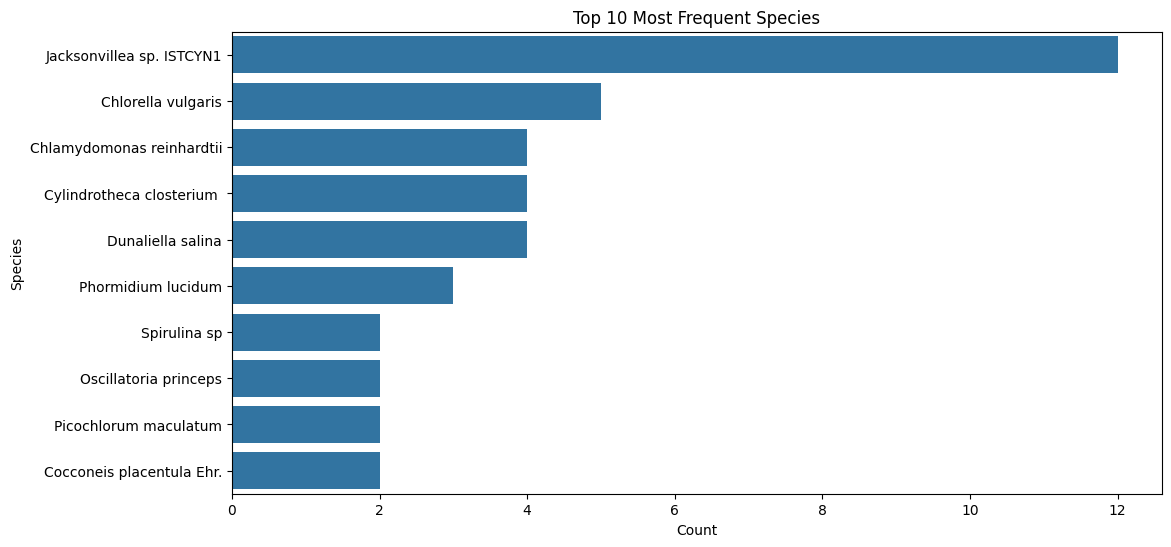

In [4]:
species_count = df['Species'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=species_count.index, 
            x=species_count.values, 
            orient = 'h',
            legend=False)

plt.ylabel('Species')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Species')

plt.show()

Plastic Type Barplot

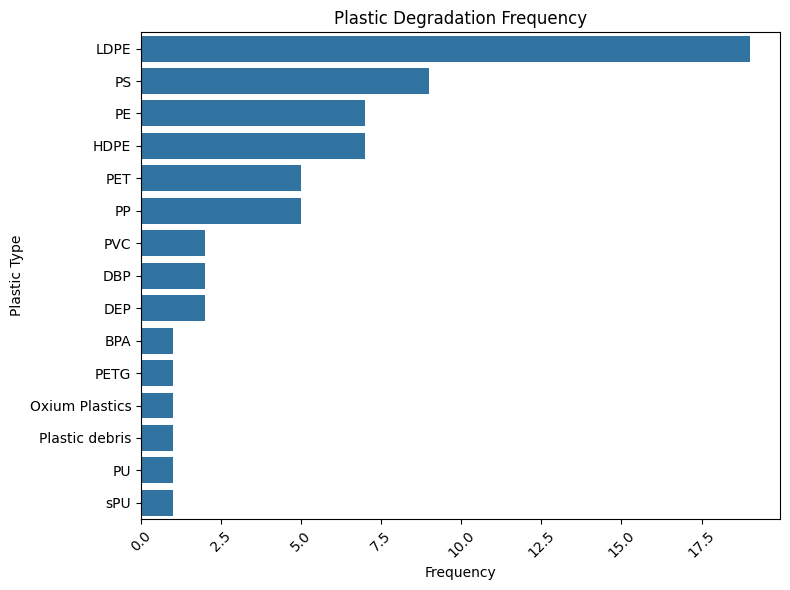

In [6]:
# Count the frequency of each plastic type
plastic_freq = df['Plastic Degraded'].value_counts()


# Create a barplot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(y=plastic_freq.index, x=plastic_freq.values,
            orient = 'h')

# Adding labels and title
plt.ylabel('Plastic Type')
plt.xlabel('Frequency')
plt.title('Plastic Degradation Frequency')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()